In [76]:
import cv2
import glob
import numpy as np
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.metrics import classification_report
from sklearn.externals import joblib
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



def preprocess(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(img, (40, 40))
    return image

def extractfeat(path):
    list_hog_fd = []
    for files in os.listdir(path):
        img = preprocess(path + "/" + files)
        print(path + "/" + files)
        fd = hog(img, orientations=9, pixels_per_cell=(30, 30), cells_per_block=(1, 1), visualise=False)
        list_hog_fd.append(fd)
    hog_features = np.array(list_hog_fd, 'float64')
    return hog_features



In [35]:
Text_path = "./text_nontext-dataset/text"
Non_Text_path = "./text_nontext-dataset/nontext"
test_path = "./crossvalidation-set/text/"
Non_test_path = "./crossvalidation-set/non_text"

print("Extracting Features(0%)")
train_text = extractfeat(Text_path)
print("Extracting Features(25%)")
train_nontext = extractfeat(Non_Text_path)
print("Extracting Features(50%)")
test_text = extractfeat(test_path)
print("Extracting Features(75%)")
test_nontext = extractfeat(Non_test_path)
print("Done")

trainfeat = np.vstack((train_text,train_nontext))
testfeat =np.vstack((test_text,test_nontext))

trainfeat = preprocessing.normalize(trainfeat)
testfeat = preprocessing.normalize(testfeat)

print("Saving Features....")
np.save("./trainfeat.mat",trainfeat)
np.save("./testfeat.mat",testfeat)
print("Saved")

trainlabeltext = np.ones(len(os.listdir(Text_path)))
trainlabelnontext = np.zeros(len(os.listdir(Non_Text_path )))
labeltrain = np.hstack((trainlabeltext,trainlabelnontext))

testlabeltext = np.ones(len(os.listdir(test_path)))
testlabelnontext = np.zeros(len(os.listdir(Non_test_path)))
labeltest = np.hstack((testlabeltext,testlabelnontext))



Extracting Features(0%)
Extracting Features(25%)
Extracting Features(50%)
Extracting Features(75%)
Done
Saving Features....
Saved


In [36]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(trainfeat, labeltrain)
print("Training Model.....")
y_pred_train = svclassifier.predict(trainfeat)
y_pred_test = svclassifier.predict(testfeat)
print("Done")
print("Training:"+classification_report(labeltrain, y_pred_train))
print("Testing:"+classification_report(labeltest, y_pred_test))


Training Model.....
Done
Training:             precision    recall  f1-score   support

        0.0       0.91      0.92      0.91       177
        1.0       0.91      0.90      0.91       177

avg / total       0.91      0.91      0.91       354

Testing:             precision    recall  f1-score   support

        0.0       0.84      0.84      0.84        31
        1.0       0.84      0.84      0.84        31

avg / total       0.84      0.84      0.84        62



In [37]:
joblib.dump(svclassifier, './Model.pkl') 

['./Model.pkl']

In [23]:
# clf = joblib.load('filename.pkl') 

../testing_images//test_13.png
../testing_images//test_20.png
../testing_images//test_9.png
../testing_images//test_5.png
../testing_images//test_16.png
../testing_images//test_17.png
../testing_images//test_15.png
../testing_images//test_21.png
../testing_images//test_14.png
../testing_images//test_3.png
../testing_images//test_1.png
../testing_images//test_4.png
../testing_images//test_6.png
../testing_images//test_19.png
../testing_images//test_10.png
../testing_images//test_7.png
../testing_images//test_2.png
../testing_images//test_8.png
../testing_images//test_18.png
../testing_images//test_12.png
../testing_images//test_11.png
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


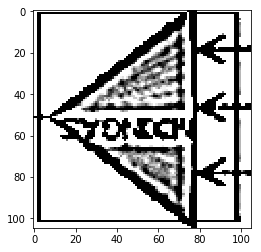

In [98]:
test = extractfeat("../testing_images/")
# test = extractfeat(test_path)

test = preprocessing.normalize(test)

image_no = 13
test_img_path = "../testing_images/test_" + str(image_no) + ".png"
image = cv2.imread(test_img_path)
# image = cv2.imread("./crossvalidation-set/text/pic_17.png")
imgplot = plt.imshow(image)

y_pred_test = svclassifier.predict(test)
print(y_pred_test)
